In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import OLSInfluence
%matplotlib inline


Q2

In [2]:
df=pd.read_csv(r"C:\Users\sandr\Downloads\50_Startups.csv")
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
df_index=df.drop(['State'],axis=1)
df_index.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [4]:
#using scikit_learn
X=df_index[['R&D Spend','Administration','Marketing Spend']]
y=df_index['Profit']
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=42)
#fit the regression model
model=LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the coefficients and performance metrics
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Coefficients: [ 0.80377928 -0.06792917  0.03124155]
Intercept: 54071.87574599086
Mean Squared Error: 80926321.22295167
R-squared: 0.900065308303732


In [6]:
#using OLS
X_features = df_index.drop(['Profit'], axis=1)

# Add constant intercept term 1 to dataset
X = sm.add_constant(X_features)
y = df_index['Profit']

# Split data into trian and test
train_X, test_X, train_y, test_y = train_test_split(X, y, train_size=0.8, random_state=42)

# Fit the regression model
mlr_model = sm.OLS(train_y, train_X).fit()
mlr_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                     Results: Ordinary least squares
=========================================================================
Model:                OLS                Adj. R-squared:       0.950     
Dependent Variable:   Profit             AIC:                  849.3606  
Date:                 2024-01-12 09:23   BIC:                  856.1161  
No. Observations:     40                 Log-Likelihood:       -420.68   
Df Model:             3                  F-statistic:          246.6     
Df Residuals:         36                 Prob (F-statistic):   4.76e-24  
R-squared:            0.954              Scale:                8.8765e+07
-------------------------------------------------------------------------
                  Coef.     Std.Err.    t    P>|t|    [0.025     0.975]  
-------------------------------------------------------------------------
const           54071.8757 8166.6599  6.6211 0.0000 37509.1217 70634.6298
R&D Spend           0.8038    0.0505 15.9056 0.0000     0.7013     0.9063
Administration     -0.0679    0.0590 -1.1517 0.2570    -0.1875     0.0517
Marketing Spend     0.0312    0.0209  1.4933 0.1441    -0.0112     0.0737
-------------------------------------------------------------------------
Omnibus:                 15.613         Durbin-Watson:            1.759  
Prob(Omnibus):           0.000          Jarque-Bera (JB):         21.146 
Skew:                    -1.137         Prob(JB):                 0.000  
Kurtosis:                5.742          Condition No.:            1626908
=========================================================================
Notes:
[1] Standard Errors assume that the covariance matrix of the errors is
correctly specified.
[2] The condition number is large, 1.63e+06. This might indicate
that there are strong multicollinearity or other numerical
problems.
"""

C:\Users\sandr\AppData\Local\Temp\ipykernel_6400\1620714777.py:10: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(cook_distance, markerfmt=",", linefmt="r-", basefmt="b-", use_line_collection=True)


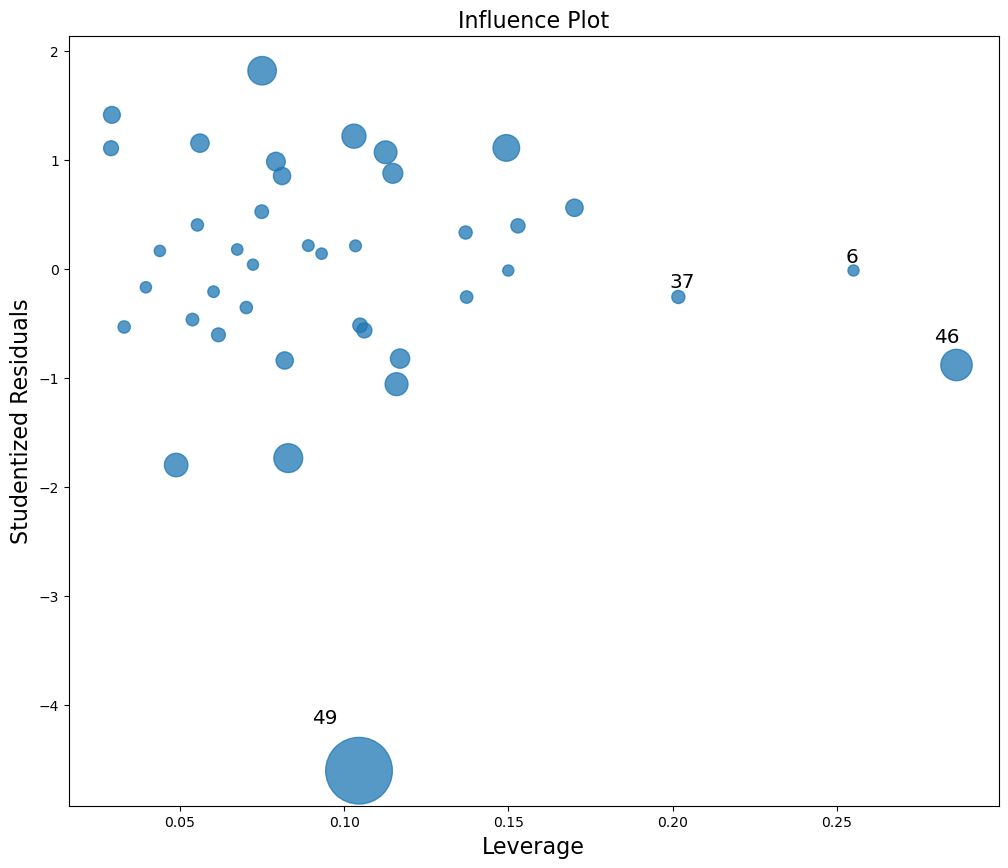

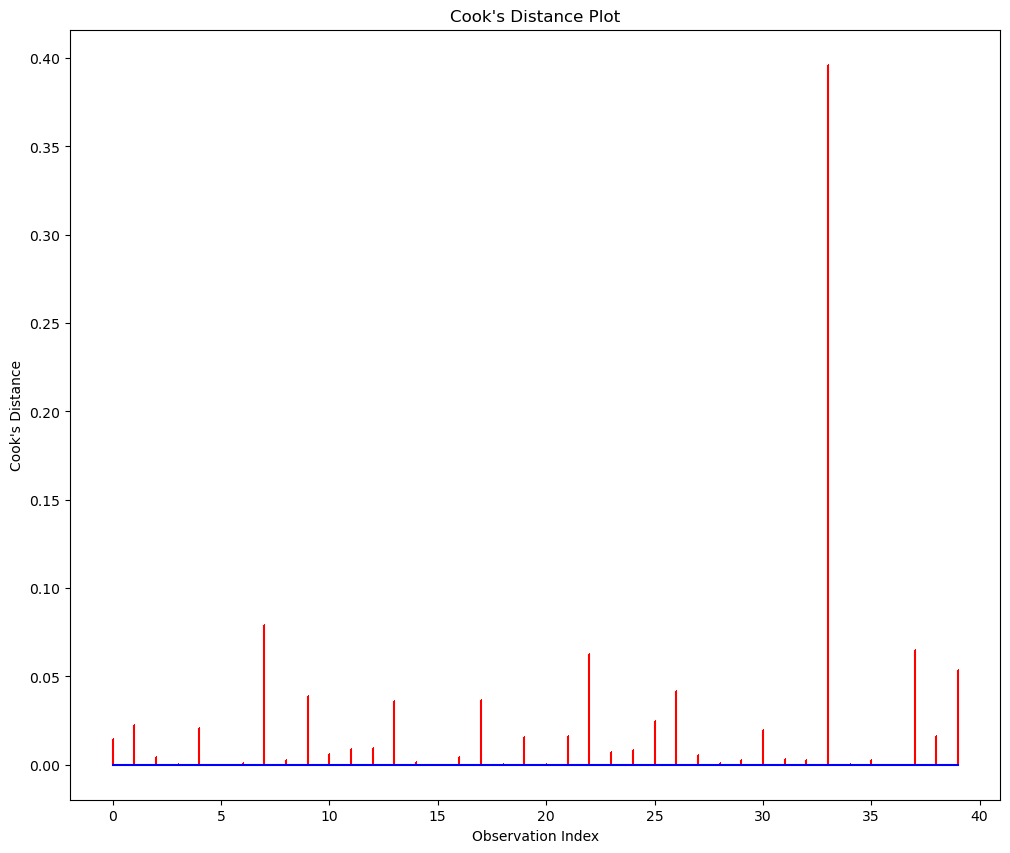

In [7]:
influence = OLSInfluence(mlr_model)
cook_distance = influence.cooks_distance[0]

# Influence plot
fig, ax = plt.subplots(figsize=(12, 10))
sm.graphics.influence_plot(mlr_model, ax=ax, criterion="cooks")

# Cook's distance plot
plt.figure(figsize=(12, 10))
plt.stem(cook_distance, markerfmt=",", linefmt="r-", basefmt="b-", use_line_collection=True)
plt.title("Cook's Distance Plot")
plt.xlabel("Observation Index")
plt.ylabel("Cook's Distance")

plt.show()

Q1

In [8]:
import pandas as pd
df1=pd.read_csv(r"C:\Users\sandr\Downloads\ToyotaCorolla.csv",encoding='latin1')
df1

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


Coefficients: [-1.19692339e+02 -2.07609498e-02  2.85215331e+01 -1.08496529e-01
  5.57323418e+00  5.66402069e+02  1.42716995e+00  1.93639260e+01]
Intercept: -7623.306939648803
Mean Squared Error: 1950244.9877904244
R-squared: 0.8538352805672255


Text(0.5, 1.0, 'Actual price and Predicted Prices')

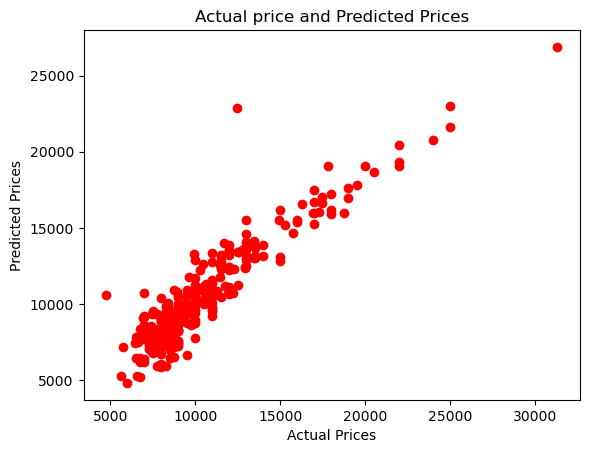

In [9]:
pred_columns=["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]
df=df1[pred_columns]
X=df.drop('Price',axis=1)
y=df['Price']
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=42)
#fit the regression model
model=LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the coefficients and performance metrics
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("Mean Squared Error:", mse)
print("R-squared:", r2)
plt.scatter(y_test, y_pred,color='red')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual price and Predicted Prices")

In [10]:
#using OLS
pred_columns=["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]
df=df1[pred_columns]
X_features=df.drop('Price',axis=1)
# Add constant intercept term 1 to dataset
X = sm.add_constant(X_features)
y = df['Price']

# Split data into trian and test
train_X, test_X, train_y, test_y = train_test_split(X, y, train_size=0.8, random_state=42)

# Fit the regression model
mlr_model = sm.OLS(train_y, train_X).fit()
mlr_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                     Results: Ordinary least squares
=========================================================================
Model:                OLS                Adj. R-squared:       0.865     
Dependent Variable:   Price              AIC:                  19785.8954
Date:                 2024-01-12 09:24   BIC:                  19831.3074
No. Observations:     1148               Log-Likelihood:       -9883.9   
Df Model:             8                  F-statistic:          916.1     
Df Residuals:         1139               Prob (F-statistic):   0.00      
R-squared:            0.865              Scale:                1.7752e+06
-------------------------------------------------------------------------
                Coef.     Std.Err.    t     P>|t|     [0.025     0.975]  
-------------------------------------------------------------------------
const         -7623.3069 1578.2446  -4.8302 0.0000 -10719.9002 -4526.7137
Age_08_04      -119.6923    2.8991 -41.2857 0.0000   -125.3806  -114.0041
KM               -0.0208    0.0014 -14.9144 0.0000     -0.0235    -0.0180
HP               28.5215    3.1117   9.1658 0.0000     22.4162    34.6269
cc               -0.1085    0.0904  -1.1996 0.2305     -0.2860     0.0690
Doors             5.5732   44.1190   0.1263 0.8995    -80.9903    92.1368
Gears           566.4021  207.3512   2.7316 0.0064    159.5688   973.2353
Quarterly_Tax     1.4272    1.4322   0.9965 0.3192     -1.3829     4.2373
Weight           19.3639    1.2387  15.6323 0.0000     16.9335    21.7943
-------------------------------------------------------------------------
Omnibus:                113.220         Durbin-Watson:            2.066  
Prob(Omnibus):          0.000           Jarque-Bera (JB):         715.235
Skew:                   -0.165          Prob(JB):                 0.000  
Kurtosis:               6.853           Condition No.:            3162594
=========================================================================
Notes:
[1] Standard Errors assume that the covariance matrix of the errors is
correctly specified.
[2] The condition number is large, 3.16e+06. This might indicate
that there are strong multicollinearity or other numerical
problems.
"""

C:\Users\sandr\AppData\Local\Temp\ipykernel_6400\1620714777.py:10: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(cook_distance, markerfmt=",", linefmt="r-", basefmt="b-", use_line_collection=True)


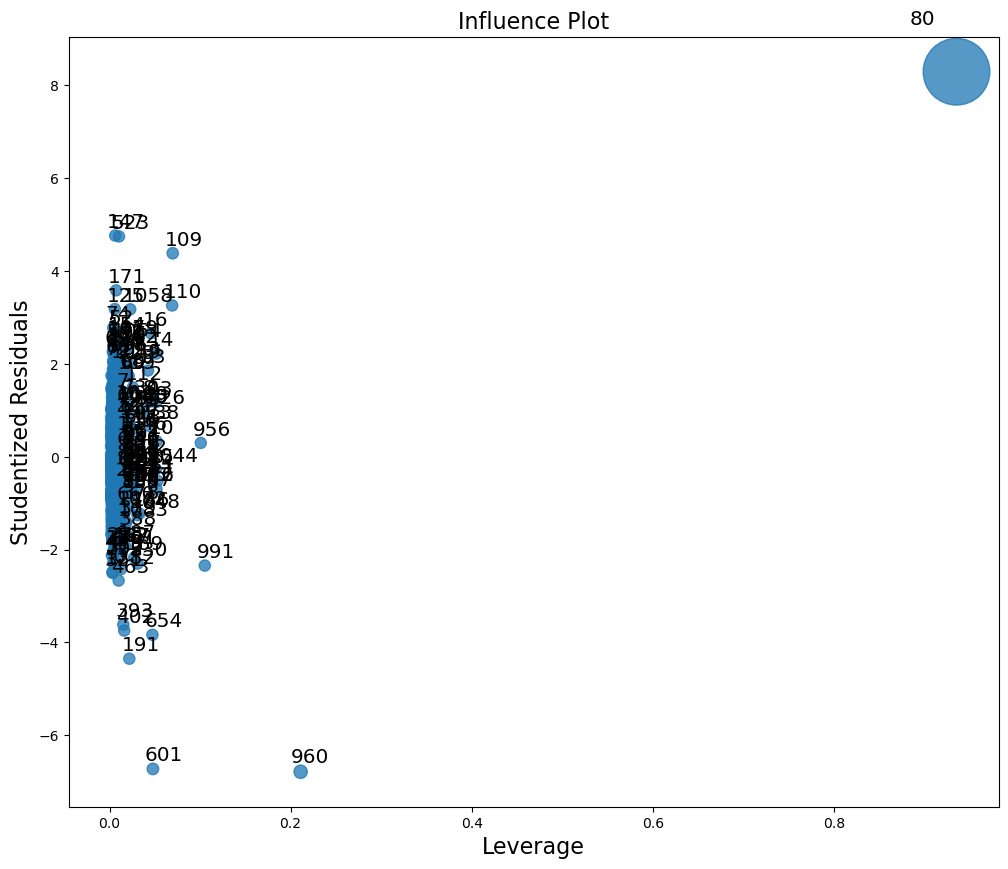

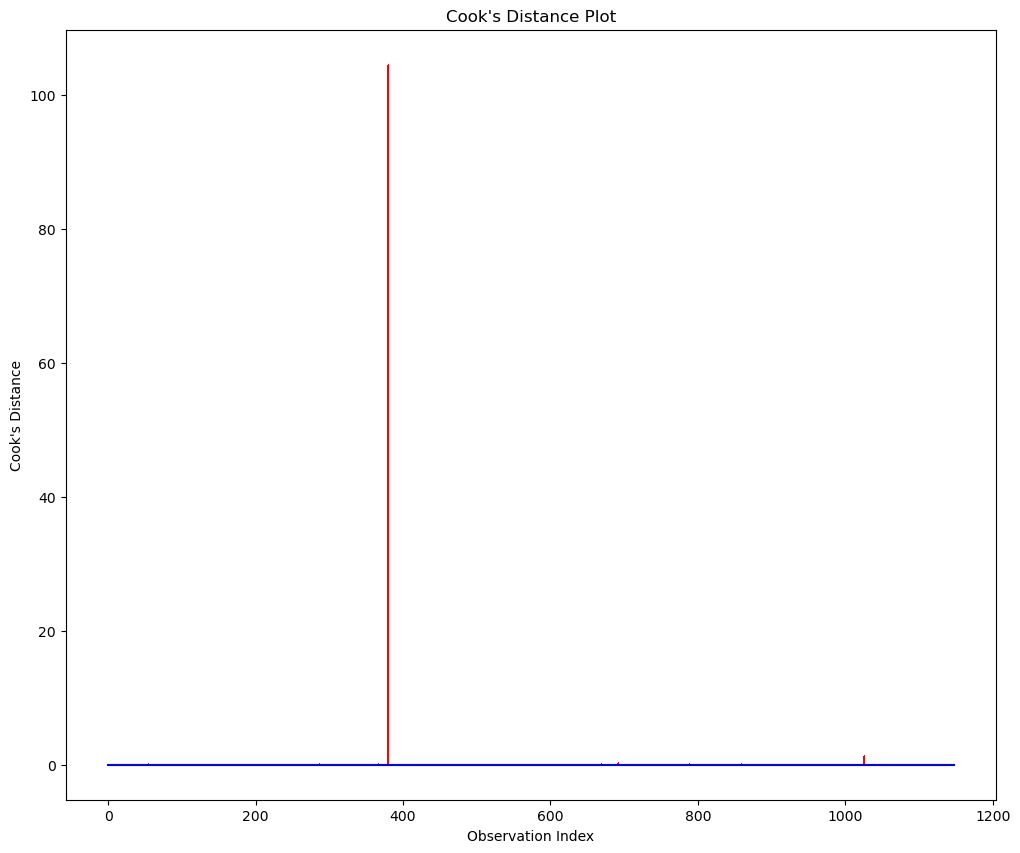

In [11]:
influence = OLSInfluence(mlr_model)
cook_distance = influence.cooks_distance[0]

# Influence plot
fig, ax = plt.subplots(figsize=(12, 10))
sm.graphics.influence_plot(mlr_model, ax=ax, criterion="cooks")

# Cook's distance plot
plt.figure(figsize=(12, 10))
plt.stem(cook_distance, markerfmt=",", linefmt="r-", basefmt="b-", use_line_collection=True)
plt.title("Cook's Distance Plot")
plt.xlabel("Observation Index")
plt.ylabel("Cook's Distance")

plt.show()